# Exploratory Analysis with Linear Regressions - Lab 13

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the data you receive into a Pandas DataFrame

In [2]:
weather = pd.read_csv("weatherHistory.csv")
weather

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

## Show the first five rows of the data set.

In [3]:
temperature_and_visibiltiy =weather[["Temperature (C)","Visibility (km)"]].head(5)
temperature_and_visibiltiy

Temperature (C)  Visibility (km)
0         9.472222          15.8263
1         9.355556          15.8263
2         9.377778          14.9569
3         8.288889          15.8263
4         8.755556          15.8263

## Show the description and the info of the data set.

In [4]:
temperature_and_visibiltiy.describe()

Temperature (C)  Visibility (km)
count         5.000000         5.000000
mean          9.050000        15.652420
std           0.511141         0.388807
min           8.288889        14.956900
25%           8.755556        15.826300
50%           9.355556        15.826300
75%           9.377778        15.826300
max           9.472222        15.826300

In [5]:
temperature_and_visibiltiy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (C)  5 non-null      float64
 1   Visibility (km)  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


## Using a regression model, split your data into train and test data.

In [6]:
X = weather["Temperature (C)"].values
y = weather["Visibility (km)"].values
X

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

In [7]:
X=X.reshape(-1,1)
X

array([[ 9.47222222],
       [ 9.35555556],
       [ 9.37777778],
       ...,
       [22.03888889],
       [21.52222222],
       [20.43888889]])

In [8]:
y

array([15.8263, 15.8263, 14.9569, ..., 16.1   , 16.1   , 15.5204])

## Fit your training split to the regression model.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.6,test_size=0.4,random_state=100)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print(f"Train accuracy {round(model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,2)} %")

Train accuracy 15.58 %
Test accuracy 15.2 %


## Draw at least three conclusions from your regression model.

Text(0.5, 1.0, 'Training data')

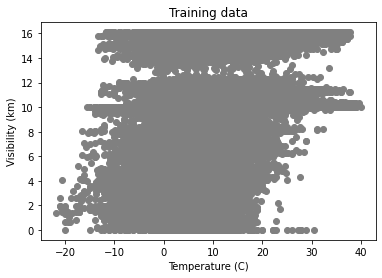

In [10]:
%matplotlib inline
plt.scatter(X,y,color='gray')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.title('Training data')

Text(0.5, 1.0, 'Trained model plot')

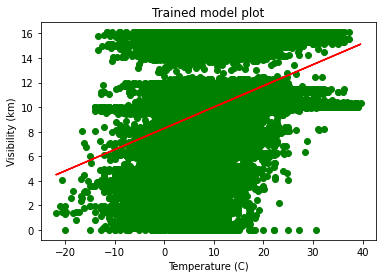

In [11]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_predict, color='red')
plt.xlabel("Temperature (C)")
plt.ylabel("Visibility (km)")
plt.title("Trained model plot")